# Stock Price Movement Simulation using Monte Carlo method

### Setup

<b> Monte Carlo Simulations of the stock price of Apple Inc shares on 7/6/2020. The simulation depicts various movements in share prices assuming a normal distribution. Although, the distribution used could be altered so that the simulation can better predict extreme events. For example - a Frechet or Gumbel distribution could be used. <b>

Required to use fix_yahoo libraries as had yahoo had difficulties retrieving data from yahoo.

In [77]:
# Import libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm
import fix_yahoo_finance as fyf
from pandas_datareader import data as pdr
fyf.pdr_override()

In [70]:
# Data Scraping 
data = pd.DataFrame()
prices = pdr.get_data_yahoo('AAPL', data_source = 'yahoo', start='2020-6-7')['Adj Close']
prices.head()

[*********************100%***********************]  1 of 1 downloaded


Date
2020-06-08    82.81
2020-06-09    85.42
2020-06-10    87.62
2020-06-11    83.41
2020-06-12    84.13
Name: Adj Close, dtype: float64

In [71]:
# Variables
log_returns = np.log(1 + prices.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()
t_intervals = 365
iterations = 30

In [72]:
# Model Creation
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations )))
priceatzero = prices.iloc[-1]

In [73]:
price_list = np.zeros_like(daily_returns)
price_list[0] = priceatzero

for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

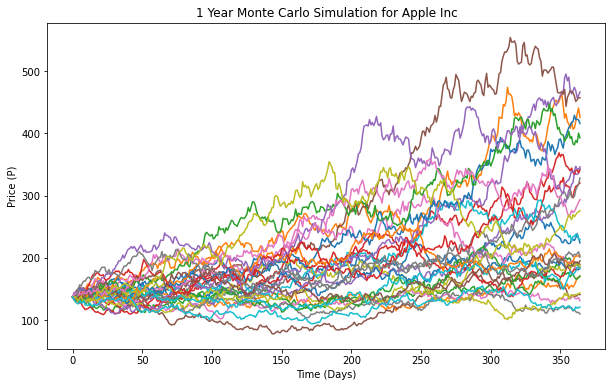

In [76]:
# Graphing
plt.figure(figsize=(10,6))
plt.title("1 Year Monte Carlo Simulation for Apple Inc")
plt.ylabel("Price (P)")
plt.xlabel("Time (Days)")
plt.plot(price_list)
plt.show()